<a href="https://colab.research.google.com/github/VamsiKrishna-9/Predictive-Analytics-For-Data-Science/blob/main/customer_movement_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Most popular customer movements:
              movement  count
0  Entrance -> Aisle 1      2
1  Aisle 1 -> Checkout      1
2  Entrance -> Aisle 2      1
3  Aisle 2 -> Checkout      1
4   Aisle 1 -> Aisle 3      1


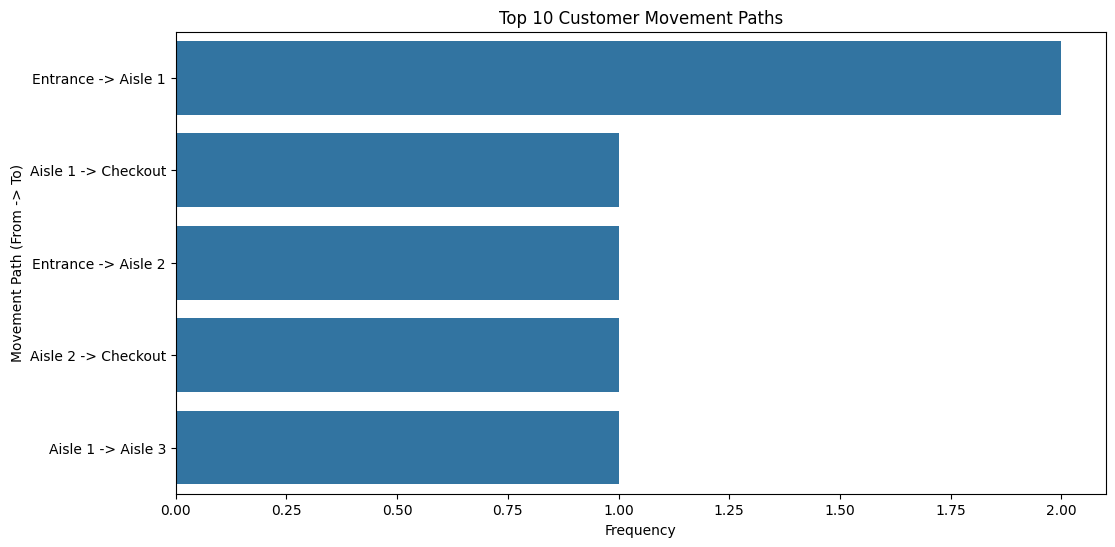


Most popular dwell locations:
   location  count
0   Aisle 1      2
1  Checkout      2
2   Aisle 2      1
3   Aisle 3      1


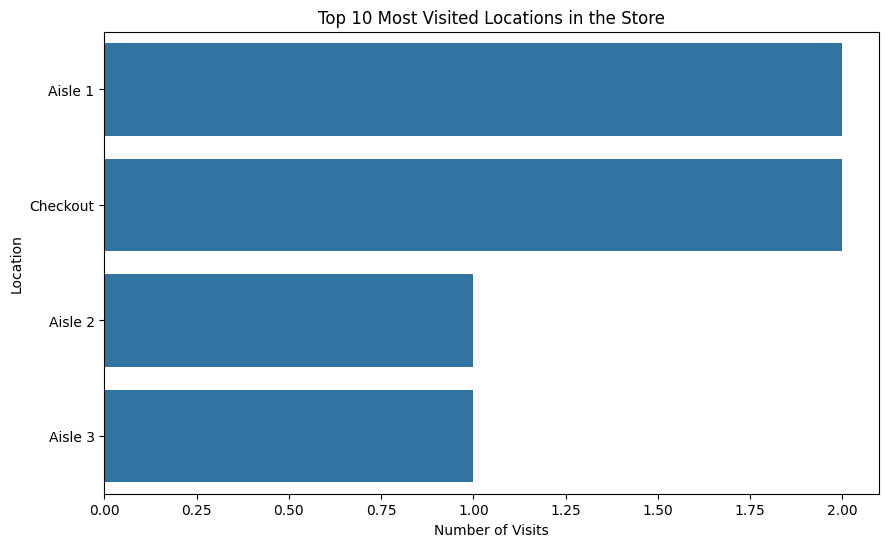


Most frequent consecutive location movements:
  location next_location  count
0  Aisle 1       Aisle 3      1
1  Aisle 1      Checkout      1
2  Aisle 2      Checkout      1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming you have data in a pandas DataFrame called 'customer_data'
# with columns like 'customer_id', 'timestamp', 'location'

# Create a sample DataFrame for demonstration purposes
data = {'customer_id': [1, 1, 1, 2, 2, 2, 3, 3, 3],
        'timestamp': ['2023-01-01 10:00:00', '2023-01-01 10:30:00', '2023-01-01 11:00:00',
                      '2023-01-01 10:15:00', '2023-01-01 10:45:00', '2023-01-01 11:15:00',
                      '2023-01-01 10:05:00', '2023-01-01 10:35:00', '2023-01-01 11:05:00'],
        'location': ['Entrance', 'Aisle 1', 'Checkout', 'Entrance', 'Aisle 2', 'Checkout', 'Entrance', 'Aisle 1', 'Aisle 3']}
customer_data = pd.DataFrame(data)

# Preprocessing and Feature Engineering
# Convert timestamp to datetime
customer_data['timestamp'] = pd.to_datetime(customer_data['timestamp'])

# Extract features from timestamp (e.g., hour of day, day of week)
customer_data['hour'] = customer_data['timestamp'].dt.hour
customer_data['dayofweek'] = customer_data['timestamp'].dt.dayofweek

# Create a simple sequence of locations for each customer visit
customer_data = customer_data.sort_values(by=['customer_id', 'timestamp'])
customer_data['prev_location'] = customer_data.groupby('customer_id')['location'].shift(1)
customer_data['movement'] = customer_data['prev_location'] + ' -> ' + customer_data['location']
customer_data = customer_data.dropna(subset=['prev_location']) # Remove rows where there's no previous location

# Aggregate customer movement patterns
movement_patterns = customer_data.groupby('customer_id')['movement'].apply(list).reset_index()
movement_patterns.columns = ['customer_id', 'movement_sequence']

# For simpler analysis, let's just count the frequency of each movement
movement_counts = customer_data['movement'].value_counts().reset_index()
movement_counts.columns = ['movement', 'count']

# Analyze popular movement paths
print("Most popular customer movements:")
print(movement_counts.head(10))

# Visualize popular movements (e.g., using a directed graph or a Sankey diagram)
# This requires additional libraries like networkx or plotly, which are not standard Colab installations

# Example: Using Matplotlib to visualize top movements (simplified)
top_movements = movement_counts.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='movement', data=top_movements)
plt.title('Top 10 Customer Movement Paths')
plt.xlabel('Frequency')
plt.ylabel('Movement Path (From -> To)')
plt.show()

# Identify popular dwell locations (where customers spend time)
dwell_locations = customer_data['location'].value_counts().reset_index()
dwell_locations.columns = ['location', 'count']
print("\nMost popular dwell locations:")
print(dwell_locations.head(10))

# Visualize dwell locations
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='location', data=dwell_locations.head(10))
plt.title('Top 10 Most Visited Locations in the Store')
plt.xlabel('Number of Visits')
plt.ylabel('Location')
plt.show()

# For product placement optimization:
# - Identify high-traffic areas (from dwell locations and movement patterns)
# - Place high-margin or impulse-buy products in these areas or along popular paths.
# - Place related products together based on movement patterns (e.g., customers moving from milk to cereal)
# - Use A/B testing to measure the impact of product placement changes.

# Example of identifying common consecutive movements (requires analyzing the sequence)
# This can be done by creating pairs of consecutive locations for each customer
customer_data['next_location'] = customer_data.groupby('customer_id')['location'].shift(-1)
consecutive_movements = customer_data.dropna(subset=['next_location']).groupby(['location', 'next_location']).size().reset_index(name='count')
consecutive_movements = consecutive_movements.sort_values(by='count', ascending=False)

print("\nMost frequent consecutive location movements:")
print(consecutive_movements.head(10))

# Further analysis could involve:
# - Using Markov chains to model customer movement probability.
# - Applying clustering (e.g., KMeans) to group customers with similar movement patterns.
# - Building a predictive model (e.g., using sequence models) to forecast future movements.

# Product Placement Optimization Strategy (Conceptual):
# 1. Analyze high-frequency movement paths: Identify the most common routes customers take through the store.
# 2. Identify high-dwell areas: Determine where customers spend the most time.
# 3. Analyze consecutive movements: Understand which areas are typically visited after another.
# 4. Consider product categories and sales data: Link movement patterns to sales performance of products in different locations.
# 5. Develop hypotheses for product placement changes: Based on the analysis, propose moving certain products to new locations to increase visibility and impulse buys.
# 6. Implement changes and measure impact: Use A/B testing or track sales data after implementation to evaluate the effectiveness of the optimization.

# This is a high-level example. Real-world implementation would involve more sophisticated data analysis,
# potentially using spatial data, and incorporating business knowledge.